In [85]:
# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
# Load dataset (Pandas). The following commands are for exploring/manipulating the DataFrame.
dataset = pd.read_csv('Salary_Data.csv')

# Separate features and target variable
X = dataset.iloc[:, :-1].values  # Features (YearsExperience)
y = dataset.iloc[:, -1].values   # Target variable (Salary)

# info(): quick overview of columns, non-null counts and dtypes
dataset.info()
# head(): show first rows
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [87]:
# Missing data handling
dataset.isnull().sum()   # count missing values per column
# dataset[dataset.isnull().any(axis=1)] # show rows with at least one missing value

YearsExperience    0
Salary             0
dtype: int64

In [88]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=1.0/3, random_state= 0)


In [89]:
# Model training
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [90]:
# Make predictions
y_pred = regressor.predict(X_test)
regressor.predict(np.array([42]).reshape(-1, 1))

array([419345.77485517])

In [91]:
# --- IGNORE ---
# Reshape summary — convert 1D array to 2D (concise)
# Create a 1D array with 3 elements
test = np.array([23, 32, 3])
n = test.size  # total elements (n == 3)

# Rule: rows * cols must equal n (total number of elements)
# Examples for n=3:
test.reshape(1, 3)   # (1, 3) -> 1 row, 3 columns (row vector)
test.reshape(3, 1)   # (3, 1) -> 3 rows, 1 column (column vector)

# Let NumPy infer one dimension using -1 (useful and safe):
test.reshape(-1, 1)  # -> (3, 1) : inferred rows, 1 column
test.reshape(1, -1)  # -> (1, 3) : 1 row, inferred columns

# Notes:
# - Use -1 at most once in reshape; the other dimensions must be explicit.
# - Alternative for a single sample with one feature: np.array([[42]])

array([[23, 32,  3]])

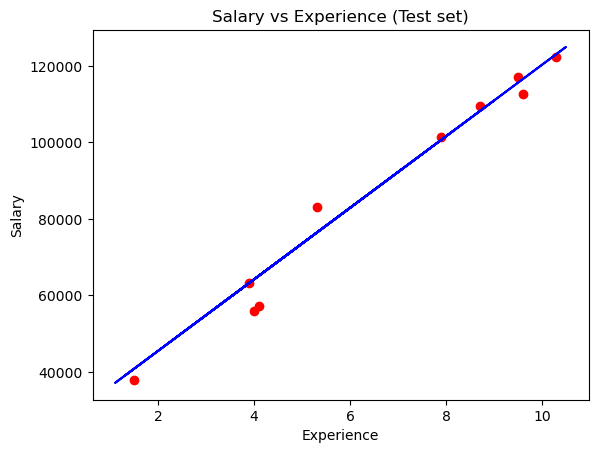

In [92]:

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()